In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Step 1: Import and Load Dataset**

We’ll mount Google Drive, check the dataset structure, and prepare the data for training.

**1️ Mount Google Drive and Define Paths**

In [2]:
import os

dataset_path = "/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset"

test_dir = os.path.join(dataset_path, "Testing")
train_dir = os.path.join(dataset_path, "Training")
val_dir = os.path.join(dataset_path, "Validation")

classes = os.listdir(dataset_path)
print("Classes:", classes)


FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/Computer_Vision_intern/Teeth_Dataset'

# **Step 2: Preprocessing & Data Augmentation**
* Normalize images (scale pixel values).

* Apply augmentations (rotation, zoom, flips).

**2️ Load Images with Augmentation**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 256
batch_size = 32

# Data Augmentation & Normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load datasets
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)


Found 3097 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1508 images belonging to 10 classes.


# **Step 3: Data Visualization**

* Show class distribution.

* Display sample images before & after augmentation.

**3️ Plot Class Distribution**

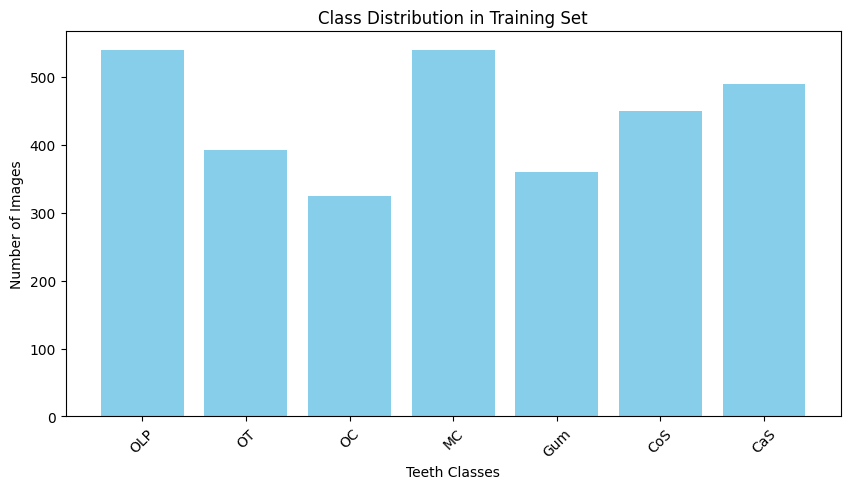

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

classes_in_training = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes_in_training}

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Teeth Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution in Training Set")
plt.xticks(rotation=45)
plt.show()


**4️ Display Sample Images**

In [1]:
# Get a batch of images
sample_batch, sample_labels = next(train_generator)

# Display images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(sample_batch[i])
    axes[i].axis("off")
plt.show()


NameError: name 'train_generator' is not defined

# **Step 4: Build the CNN Model**

* We will train a CNN from scratch as required.

**5️ Define Model Architecture**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# To get the number of classes from the train_generator
num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,879 (56.61 MB)

 Trainable params: 14,839,879 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# **Step 5: Train the Model**

**6️ Start Training**

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of training steps per epoch
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,  # Number of validation steps
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1823s 19s/step - accuracy: 0.1744 - loss: 2.3542 - val_accuracy: 0.2451 - val_loss: 1.8975
Epoch 2/20
 1/96 ━━━━━━━━━━━━━━━━━━━━ 9:44 6s/step - accuracy: 0.1250 - loss: 1.9091

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 686ms/step - accuracy: 0.1250 - loss: 1.9091 - val_accuracy: 0.2480 - val_loss: 1.8893
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 622s 6s/step - accuracy: 0.2226 - loss: 1.8719 - val_accuracy: 0.2754 - val_loss: 1.7887
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 86s 840ms/step - accuracy: 0.2188 - loss: 1.8574 - val_accuracy: 0.2861 - val_loss: 1.7886
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 637s 6s/step - accuracy: 0.2750 - loss: 1.8196 - val_accuracy: 0.2998 - val_loss: 1.7321
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 687ms/step - accuracy: 0.4062 - loss: 1.6531 - val_accuracy: 0.3086 - val_loss: 1.7285
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 621s 6s/step - accuracy: 0.2963 - loss: 1.7368 - val_accuracy: 0.3701 - val_loss: 1.6459
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 69s 681ms/step - accuracy: 0.3438 - loss: 1.5827 - val_accuracy: 0.3486 - val_loss: 1.6361
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 682s 7s/step - accuracy: 0.2820 - loss: 1.8132 - val_accuracy: 0.3037 - val_

# **Step 6: Model Evaluation**

* Plot accuracy/loss curves.

* Evaluate test set performance.

**7️ Plot Accuracy & Loss Curves**

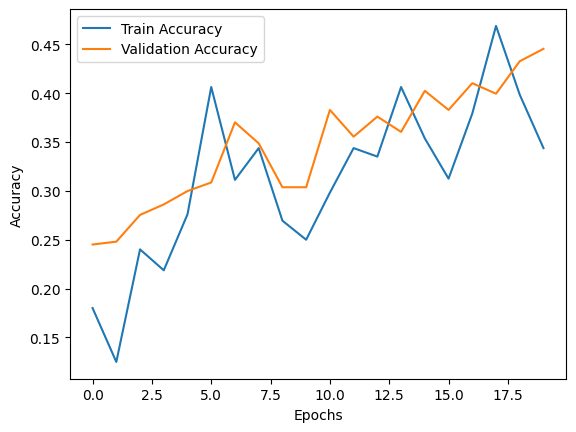

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**8️ Test Model on Unseen Data**

In [12]:
import tensorflow as tf

# Get the actual number of classes in the test set
num_classes_test = test_generator.num_classes
# Create a new model with the correct output layer
new_model = tf.keras.models.Sequential(model.layers[:-1])  # Copy all layers except the last one
new_model.add(tf.keras.layers.Dense(num_classes_test, activation='softmax'))  # Add a new output layer

# Compile the new model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the new model
test_loss, test_acc = new_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 712s 15s/step - accuracy: 0.0354 - loss: 2.5991
Test Accuracy: 12.86%


**9 Confusion Matrix**

48/48 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step


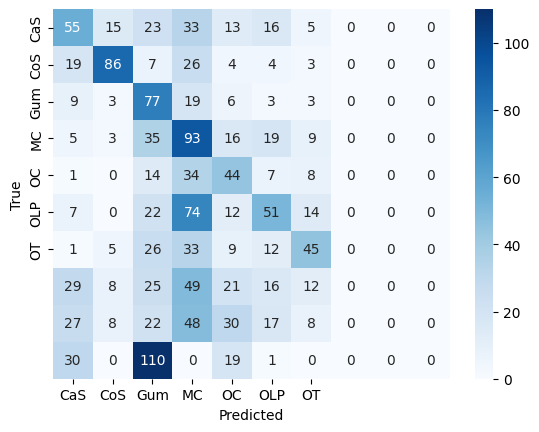

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Step 7: Save the Model**


**9 Save Model**

In [15]:
model.save("/content/drive/My Drive/Computer_Vision_intern/teeth_classification_model.h5")


# **Thanks**